K-Means clustering algorithm along with the Gap Static method to get the optimal number of clusters.

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
iris
X = iris.data[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=a3b19c062168f0c2366f3af5b61a3838352f4a1b495585fdb70747b148fae2d7
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [6]:
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
import numpy as np


optimalK = OptimalK(parallel_backend='joblib')


n_clusters = optimalK(X, cluster_array=np.arange(1, 11))

print("Optimal clusters:", n_clusters)


Optimal clusters: 3


In [7]:
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)

In [8]:
print(Y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


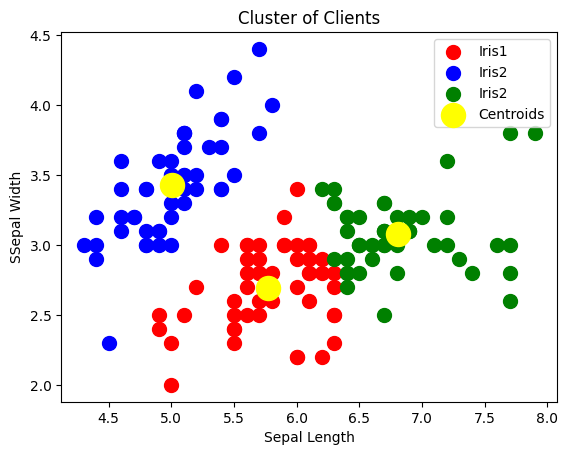

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Iris1')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Iris2')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Iris2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Sepal Length')
plt.ylabel('SSepal Width')
plt.legend()
plt.show()